In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import numpy as np
import warnings
import statistics 

warnings.filterwarnings('ignore')
#Show graphs withint Python notebook

%matplotlib inline

In [2]:
df = pd.read_csv('confirmed-cases-since-271064.csv')
df.columns #list columns' names

Index(['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit',
       'nationality', 'province_of_isolation', 'risk', 'province_of_onset',
       'district_of_onset'],
      dtype='object')

In [3]:
df.head(10)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1859158,26/10/2021,25/10/2021,ชาย,20.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
1,1859159,26/10/2021,25/10/2021,หญิง,42.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
2,1859160,26/10/2021,25/10/2021,หญิง,33.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
3,1859161,26/10/2021,25/10/2021,หญิง,52.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
4,1859162,26/10/2021,25/10/2021,หญิง,84.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
5,1859163,26/10/2021,25/10/2021,หญิง,42.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
6,1859164,26/10/2021,25/10/2021,หญิง,62.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
7,1859165,26/10/2021,25/10/2021,ชาย,50.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
8,1859166,26/10/2021,25/10/2021,ชาย,24.0,ปี,NaN,ลำพูน,อื่นๆ,ลำพูน,เมือง
9,1859167,26/10/2021,25/10/2021,หญิง,5.0,ปี,NaN,ลำพูน,อื่นๆ,ลำพูน,ทุ่งหัวช้าง


In [4]:
df[df.duplicated(keep=False)]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset


In [5]:
df = df.drop_duplicates(keep='first')

In [6]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
626960    False
626961    False
626962    False
626963    False
626964    False
Length: 626965, dtype: bool

In [7]:
df.head(10)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1859158,26/10/2021,25/10/2021,ชาย,20.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
1,1859159,26/10/2021,25/10/2021,หญิง,42.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
2,1859160,26/10/2021,25/10/2021,หญิง,33.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
3,1859161,26/10/2021,25/10/2021,หญิง,52.0,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
4,1859162,26/10/2021,25/10/2021,หญิง,84.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
5,1859163,26/10/2021,25/10/2021,หญิง,42.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
6,1859164,26/10/2021,25/10/2021,หญิง,62.0,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง
7,1859165,26/10/2021,25/10/2021,ชาย,50.0,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
8,1859166,26/10/2021,25/10/2021,ชาย,24.0,ปี,NaN,ลำพูน,อื่นๆ,ลำพูน,เมือง
9,1859167,26/10/2021,25/10/2021,หญิง,5.0,ปี,NaN,ลำพูน,อื่นๆ,ลำพูน,ทุ่งหัวช้าง


In [8]:
df['nationality'].fillna('N/A',inplace=True)

In [9]:
df['Unit'].fillna('N/A',inplace=True)

In [10]:
df['district_of_onset'].fillna('N/A',inplace=True)

In [11]:
df['province_of_onset'].fillna('N/A',inplace=True)

In [12]:
df['province_of_isolation'].fillna('N/A',inplace=True)

In [13]:
df['age'].fillna('0',inplace=True)

In [14]:
df['risk'].fillna('N/A',inplace=True)

In [15]:
df['sex'].fillna('N/A',inplace=True)

In [16]:
df['No.'].fillna('N/A',inplace=True)

In [17]:
df['age'] = df['age'].astype(float)

In [18]:
df['age'].replace('2021','WrongData', 
inplace=True)

In [19]:
df['age'].replace('330','WrongData', 
inplace=True)

In [20]:
df['age'].replace('158','WrongData', 
inplace=True)

In [21]:
df['age'].replace('149','WrongData', 
inplace=True)

In [22]:
df['age'].replace('121','WrongData', 
inplace=True)

In [23]:
df.describe()

,No.,age
count,6.269650e+05,626965.000000
mean,2.172640e+06,30.916427
std,1.809894e+05,20.783484
min,1.859158e+06,0.000000
25%,2.015899e+06,16.000000
50%,2.172640e+06,29.000000
75%,2.329381e+06,45.000000
max,2.486122e+06,2021.000000


In [24]:
df.isnull().sum()

No.                      0
announce_date            0
Notified date            0
sex                      0
age                      0
Unit                     0
nationality              0
province_of_isolation    0
risk                     0
province_of_onset        0
district_of_onset        0
dtype: int64

array([[<AxesSubplot:title={'center':'No.'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

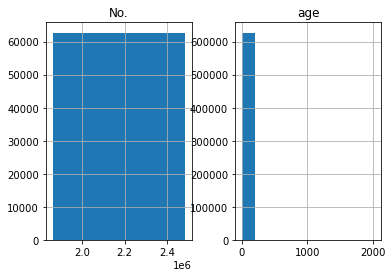

In [25]:
df.hist()

In [26]:
df['AgeGroup'] = pd.DataFrame({'age':[0,2,4,13,35,-1,54]})

bins= [0,2,4,13,20,110,1000,2000,3000]
labels = ['Infant','Toddler','Kid','Teen','Adult','Incorrect','WrongData','NotCorrect']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [27]:
df.AgeGroup.value_counts()

Adult         444817
Infant         69202
Kid            57113
Teen           44147
Toddler        11678
Incorrect          7
NotCorrect         1
WrongData          0
Name: AgeGroup, dtype: int64

In [28]:
df.nationality.value_counts()

Thailand         522242
N/A               64383
Burmese           13702
Thailnad           7557
Cambodian          4721
                  ...  
south african         1
Arabi                 1
สวีเดน                1
au                    1
Zambian               1
Name: nationality, Length: 156, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] =le.fit_transform(df['sex'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['province_of_onset'] =le.fit_transform(df['province_of_onset'])

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['district_of_onset'] =le.fit_transform(df['district_of_onset'])

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['province_of_isolation'] =le.fit_transform(df['province_of_isolation'])

In [33]:
df.head(200)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,AgeGroup
0,1859158,26/10/2021,25/10/2021,2,20.0,ปี,Thailand,48,อื่นๆ,114,1903,Adult
1,1859159,26/10/2021,25/10/2021,4,42.0,ปี,Thailand,48,อื่นๆ,114,1903,Adult
2,1859160,26/10/2021,25/10/2021,4,33.0,ปี,Thailand,48,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,114,1565,Adult
3,1859161,26/10/2021,25/10/2021,4,52.0,ปี,Thailand,48,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,114,1565,Adult
4,1859162,26/10/2021,25/10/2021,4,84.0,ปี,Thailand,48,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,114,1903,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1859353,26/10/2021,25/10/2021,2,12.0,ปี,N/A,73,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,179,1942,Kid
196,1859354,26/10/2021,25/10/2021,2,38.0,ปี,N/A,73,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,179,1367,Adult
197,1859355,26/10/2021,25/10/2021,2,25.0,ปี,N/A,73,สถานที่ทำงาน,179,2042,Adult
198,1859356,26/10/2021,25/10/2021,4,16.0,ปี,N/A,73,อื่นๆ,179,1367,Teen


In [34]:
data =df['age']
print("Standard Deviation is % s "%(statistics.stdev(data)))


Standard Deviation is 20.783484287696453 


In [35]:
data=df['age']
statistics.mean(data)
print("Mean is % s " %(statistics.mean(data))) 


Mean is 30.916426540861963 


In [36]:
data =df['province_of_isolation']
print("Standard Deviation is % s "%(statistics.stdev(data)))

Standard Deviation is 23.10797914939335 


In [37]:
data=df['province_of_isolation']
statistics.mean(data)
print("Mean is % s " %(statistics.mean(data))) 


Mean is 32.44101504868693 


In [38]:
data =df['province_of_onset']
print("Standard Deviation is % s "%(statistics.stdev(data)))

Standard Deviation is 58.35285038199736 


In [39]:
data=df['province_of_onset']
statistics.mean(data)
print("Mean is % s " %(statistics.mean(data))) 


Mean is 69.73258315854952 


In [40]:
data =df['district_of_onset']
print("Standard Deviation is % s "%(statistics.stdev(data)))

Standard Deviation is 710.1189908512282 


In [41]:
data=df['district_of_onset']
statistics.mean(data)
print("Mean is % s " %(statistics.mean(data))) 


Mean is 1017.5602577496352 


In [42]:
df.groupby(['age']).agg(['mean','sum'])

No.                     sex         province_of_isolation  \
                 mean           sum      mean     sum                  mean   
age                                                                           
0.00     2.133647e+06  133096911155  1.847547  115250             31.572571   
0.58     2.076215e+06       2076215  4.000000       4             73.000000   
0.92     2.419970e+06       2419970  2.000000       2             26.000000   
1.00     2.149754e+06   14631224036  2.906259   19780             35.760799   
1.30     2.331834e+06       6995501  3.333333      10             46.000000   
...               ...           ...       ...     ...                   ...   
121.00   2.316436e+06       4632872  4.000000       8             24.000000   
149.00   2.273864e+06       2273864  4.000000       4             76.000000   
158.00   2.242008e+06       2242008  2.000000       2             10.000000   
330.00   2.434821e+06       2434821  4.000000       4             56.000000   
2021.00  2.252849e+06       2252849  4.000000       4             73.000000   

                 province_of_onset          district_of_onset            
             sum              mean      sum              mean       sum  
age                                                                      
0.00     1969497         43.260757  2698606        605.792914  37789362  
0.58          73        179.000000      179         10.000000        10  
0.92          26         62.000000       62        724.000000       724  
1.00      243388         81.229210   552846       1099.363797   7482270  
1.30         138        107.000000      321       1270.666667      3812  
...          ...               ...      ...               ...       ...  
121.00        48         58.500000      117        644.500000      1289  
149.00        76        186.000000      186        449.000000       449  
158.00        10         23.000000       23        663.000000       663  
330.00        56        131.000000      131       1913.000000      1913  
2021.00       73        179.000000      179       2063.000000      2063  

[1162 rows x 10 columns]

<AxesSubplot:>

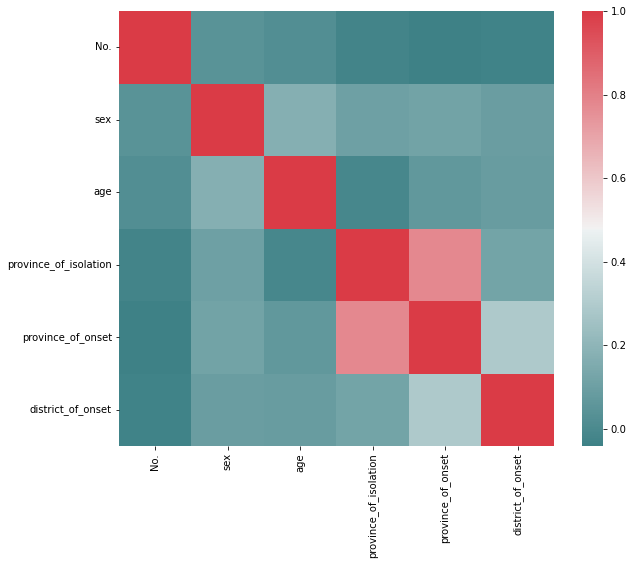

In [43]:
fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True),square=True, ax=axis)

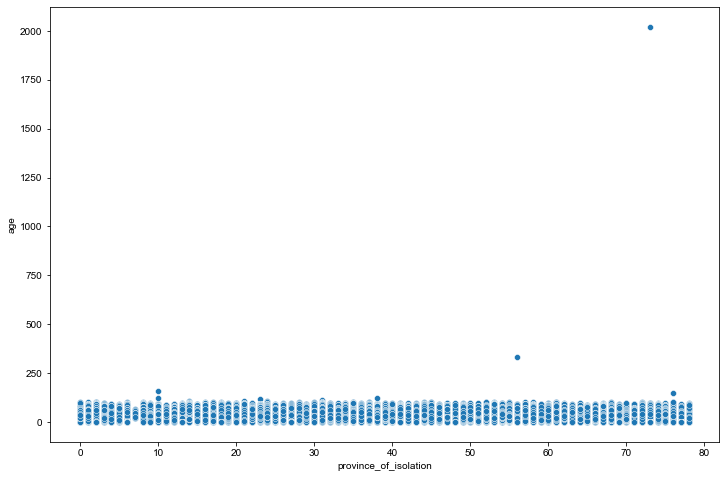

In [44]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="province_of_isolation", 
y="age", data=df)

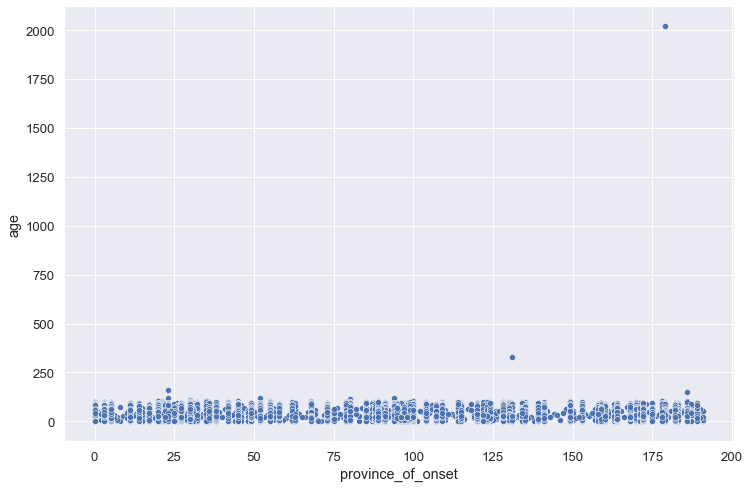

In [45]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="province_of_onset", 
y="age", data=df)

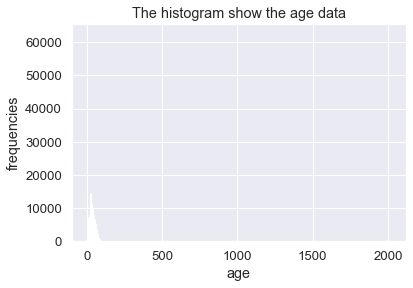

In [46]:
plt.hist(df.age, bins='auto') 
plt.title("The histogram show the age data")
plt.xlabel('age')
plt.ylabel('frequencies')
plt.show()

Text(0.5, 1.0, 'The histogram showing the distribution of age')

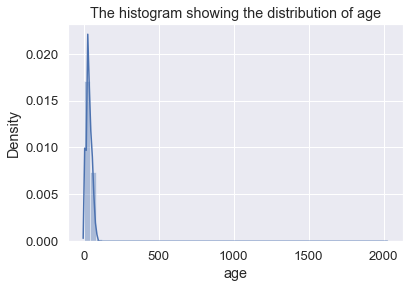

In [47]:
sns.distplot(df.age)
plt.title("The histogram showing the distribution of age")